In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

In [3]:
data=pd.read_csv("/content/Housing.csv")
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


#Data cleaning and preprocessing

In [4]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [10]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


#feature enginerring

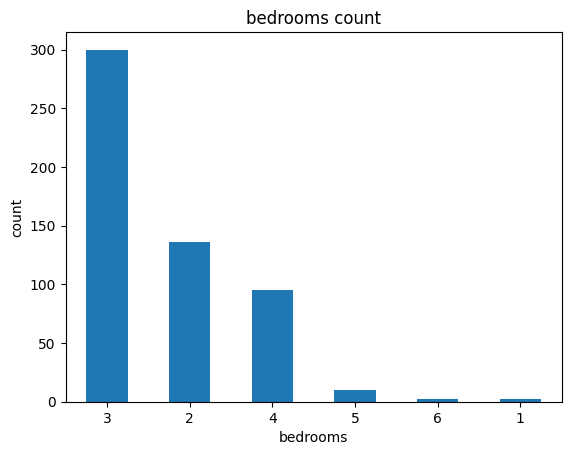

In [12]:
bedrooms_count= data['bedrooms'].value_counts()
bedrooms_count.plot(kind='bar')
plt.title("bedrooms count")
plt.xlabel("bedrooms")
plt.ylabel("count")
plt.xticks(rotation=0)
plt.show()

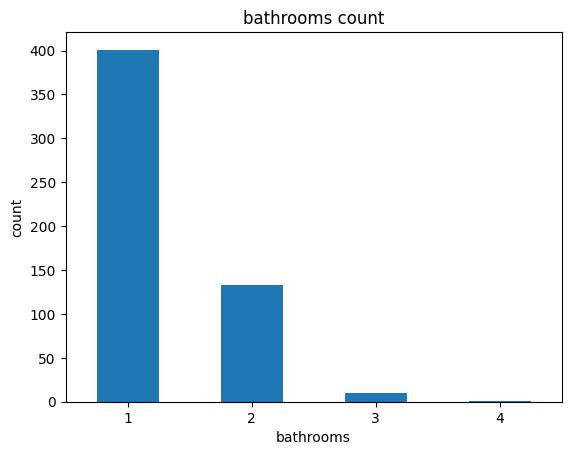

In [13]:
bathrooms_count= data['bathrooms'].value_counts()
bathrooms_count.plot(kind='bar')
plt.title("bathrooms count")
plt.xlabel("bathrooms")
plt.ylabel("count")
plt.xticks(rotation=0)
plt.show()

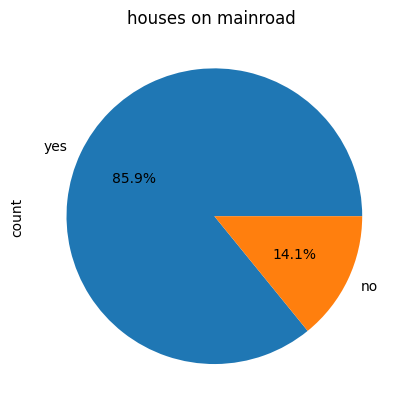

In [14]:
mainroad_count= data['mainroad'].value_counts()
mainroad_count.plot(kind='pie',autopct='%1.1f%%')
plt.title("houses on mainroad ")
plt.show()

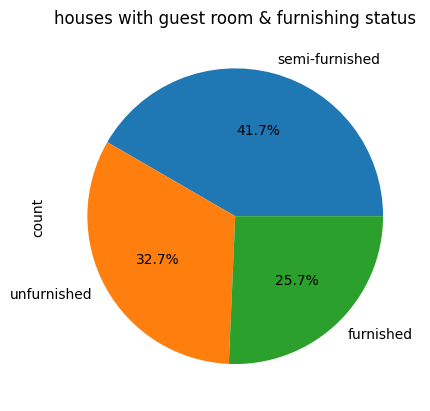

In [15]:
furnished_house_count= data['furnishingstatus'].value_counts()
furnished_house_count.plot(kind='pie',autopct='%1.1f%%')
plt.title("houses with guest room & furnishing status")
plt.show()

Text(0, 0.5, 'Count')

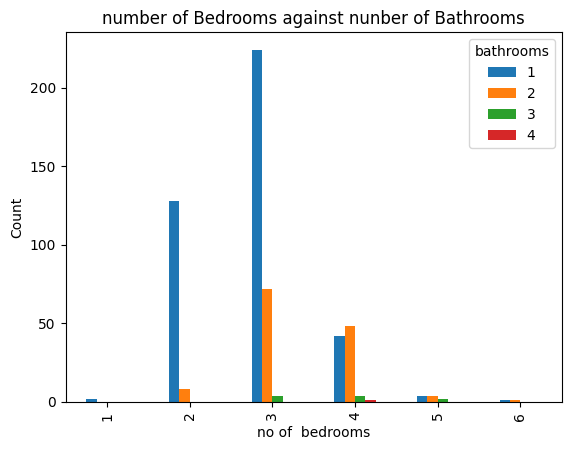

In [16]:
bedroom_bathroom= pd.crosstab(data['bedrooms'], data['bathrooms'])
bedroom_bathroom.plot(kind='bar')
plt.title("number of Bedrooms vs nunber of Bathrooms")
plt.xlabel("no of  bedrooms")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

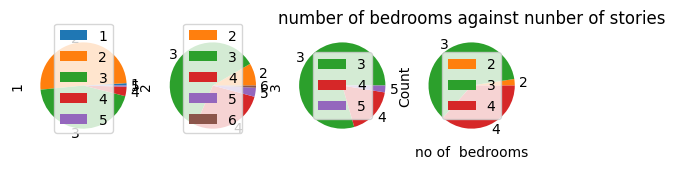

In [18]:
bedroom_stories= pd.crosstab(data['bedrooms'], data['stories'])
bedroom_stories.plot(kind='pie',subplots=True)
plt.title("number of bedrooms vs nunber of stories")
plt.xlabel("no of  bedrooms")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

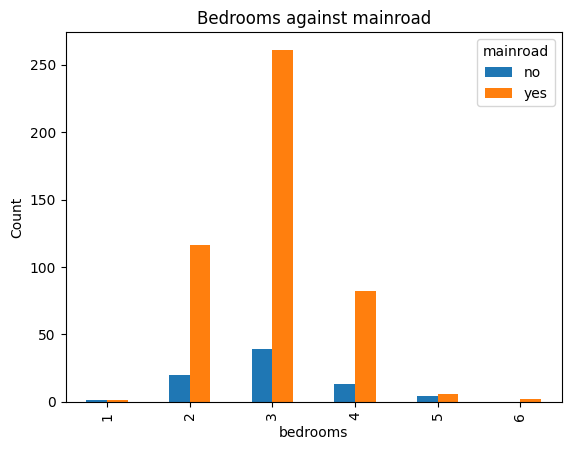

In [19]:
bedroom_mainroad= pd.crosstab(data['bedrooms'], data['mainroad'])
bedroom_mainroad.plot(kind='bar')
plt.title("bedrooms vs mainroad")
plt.xlabel("bedrooms")
plt.ylabel("Count")

In [20]:
encoder = LabelEncoder()
enodingcl = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
for cl in enodingcl:
  data[cl]=encoder.fit_transform(data[cl])

In [21]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


#Model selection and trianing

In [22]:
X=data.drop(columns=['price'],axis=1)
Y=data['price']

In [23]:
scaler=MinMaxScaler()
x=scaler.fit_transform(X)
y=scaler.fit_transform(Y.values.reshape(-1,1))

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)

In [25]:
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

#model evaluation

In [27]:
y_pred = linear_model.predict(x_test)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

In [28]:
mae

0.0738428082945209

In [29]:
mse

0.010369356427322148

In [31]:
accu= r2_score(y_test,y_pred)
accu

0.5885809098418087

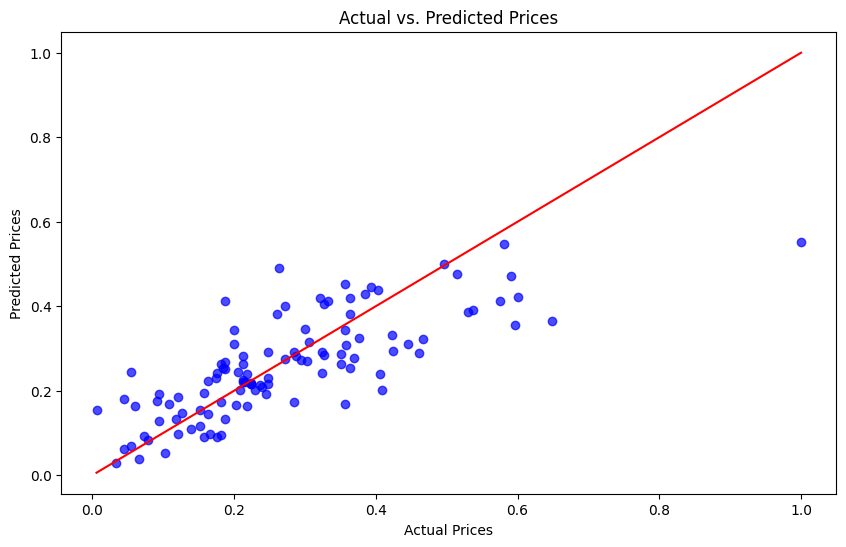

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r')
plt.xlabel('actual prices')
plt.ylabel('predicted prices')
plt.title('actual vs predicted Prices')
plt.show()

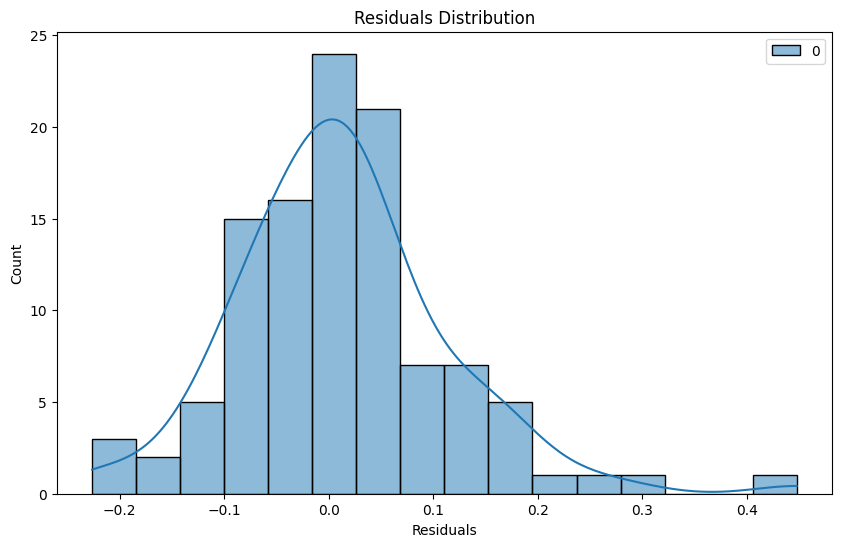

In [35]:
import seaborn as sns
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()